In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import csv

In [2]:
df = pd.read_csv('ais-processed-2019-12.csv')
df['time'] = pd.to_datetime(df['time']).dt.tz_localize(None)
df.drop(columns=['Unnamed: 0'], inplace=True)
print("This dataset contains {} records".format(len(df)))

This dataset contains 4700810 records


In [3]:
df.head()

,type,mmsi,speed,accuracy,lon,lat,course,heading,time,status,...,to_bow,to_stern,to_port,to_starboard,month,day,hour,minute,draught,destination
0,18,563015550,0.0,0.0,103.72786,1.30646,0.0,NaN,2019-12-01 00:00:07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,563037440,0.2,0.0,103.76168,1.29001,94.3,NaN,2019-12-01 00:00:07,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,563040772,12.0,0.0,103.75896,1.29214,49.4,NaN,2019-12-01 00:00:08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,566000010,0.2,1.0,103.76094,1.29310,NaN,120.0,2019-12-01 00:00:30,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,255805665,16.8,0.0,103.75723,1.13256,46.1,48.0,2019-12-01 00:00:30,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [364]:
len(df)/(30*24*60)

108.8150462962963

### Shiptype statistics

In [28]:
df_with_stype = df.loc[df.shiptype.notnull()]
df_no_stype = df.loc[df.shiptype.isnull()]
print('total: {}'.format(len(df_with_stype)+len(df_no_stype)))

total: 4700810


In [34]:
len(df_with_stype), len(df_no_stype)

(213045, 4487765)

In [30]:
mmsi_with_stype = df_with_stype['mmsi'].value_counts().index.to_list()
mmsi_no_stype = df_no_stype['mmsi'].value_counts().index.to_list()

intersections_stype = list(set(mmsi_with_stype) & set(mmsi_no_stype))
print('There are {} common MMSI'.format(len(intersections_stype)))

There are 3924 common MMSI


In [33]:
df_with_stype.set_index('mmsi', inplace=True)
df_no_stype.set_index('mmsi', inplace=True)

In [43]:
df.reset_index(inplace=True)
df.set_index('mmsi', inplace=True)

In [44]:
df.loc[:, 'shiptype'] = "Undefined"

for mmsi in intersections_stype:
    if (isinstance(df_with_stype.loc[mmsi, 'shiptype'].tolist(), list)):
        shiptype = list(set(df_with_stype.loc[mmsi, 'shiptype'].tolist()))[0]
    else:
        shiptype = df_with_stype.loc[mmsi, 'shiptype'].tolist()
    df.loc[mmsi, 'shiptype'] = shiptype

Replace shiptype with specific name

In [106]:
def map_shiptype(number):
    if type(number) == str:
        return number
    ship_cat = ''
    first_digit = int(number) // 10
    if first_digit == 1:
        ship_cat = 'Reserved'
    elif first_digit == 2:
        ship_cat = 'Wing in Ground'
    elif first_digit == 3:
        second_digit = int(number) % 10
        if second_digit == 0:
            ship_cat = 'Fishing'
        elif (second_digit == 1 or second_digit == 2):
            ship_cat = 'Towing'
        elif second_digit == 3:
            ship_cat = 'Dredging Ops'
        elif second_digit == 4:
            ship_cat = 'Diving Ops'
        elif second_digit == 5:
            ship_cat = 'Military Ops'
        elif second_digit == 6:
            ship_cat = 'Sailing'
        elif second_digit == 7:
            ship_cat = 'Pleasure Craft'
        else:
            ship_cat = 'Reserved'
    elif first_digit == 4:
        ship_cat = 'High-Speed Craft'
    elif first_digit == 5:
        second_digit = int(number) % 10
        if second_digit == 0:
            ship_cat = 'Pilot Vessel'
        if second_digit == 1:
            ship_cat = 'SAR'
        elif second_digit == 2:
            ship_cat = 'Tug'
        elif second_digit == 3:
            ship_cat = 'Port Tender'
        elif second_digit == 4:
            ship_cat = 'Pollution Control Vessel'
        elif second_digit == 5:
            ship_cat = 'Law Enforce'
        elif second_digit == 8:
            ship_cat = 'Medical Transport'
        elif second_digit == 9:
            ship_cat = 'Non-combatant Ship'
    elif first_digit == 6:
        ship_cat = 'Passenger'
    elif first_digit == 7:
        ship_cat = 'Cargo'
    elif first_digit == 8:
        ship_cat = 'Tanker'
    else:
        ship_cat = 'Others'
    return ship_cat

In [107]:
df['shiptype_name'] = df.shiptype.apply(map_shiptype)

In [222]:
shiptype_name = df['shiptype_name'].value_counts()
shiptype_name_perc = df['shiptype_name'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
df_stype = pd.DataFrame(shiptype_name)
df_stype.rename(columns={'shiptype_name': 'records'}, inplace=True)

In [252]:
shiptype_name_perc

Tanker                33.2%
Others                16.5%
Undefined             16.1%
Cargo                 13.6%
Tug                   13.0%
Passenger              1.6%
Towing                 1.3%
Pleasure Craft         1.2%
Pilot Vessel           0.7%
Sailing                0.6%
Fishing                0.5%
Reserved               0.5%
Dredging Ops           0.4%
High-Speed Craft       0.4%
Port Tender            0.2%
Wing in Ground         0.1%
Diving Ops             0.0%
Non-combatant Ship     0.0%
SAR                    0.0%
Military Ops           0.0%
Law Enforce            0.0%
Name: shiptype_name, dtype: object

In [285]:
df_stype.loc[:, 'ships'] = 0
for stype in shiptype_name.keys():
    df_stype.loc[stype, 'ships'] = len(df.loc[df['shiptype_name']==stype].mmsi.unique())

In [286]:
df_stype.sort_values(by=['ships'], ascending=False)

,records,ships
Undefined,757946,25051
Cargo,638086,1662
Tanker,1559256,1655
Others,774853,225
Tug,612853,147
Passenger,74865,75
Towing,62792,33
Pleasure Craft,55347,22
Fishing,24666,21
Dredging Ops,20507,18


In [38]:
from matplotlib import pyplot as plt

In [39]:
def plot_ais(df, by='Ships', field='Shiptype'):
    plt.style.use('seaborn-dark-palette')

    the_x = df.index.tolist()
    print(the_x)
 
    if by=='Records':
        the_y = df.records.tolist()
    else:
        the_y = df.ships.tolist()
        
    plt.barh(the_x, the_y)
    plt.title(field+' by '+by)
    plt.ylabel(field)
    plt.xlabel('Number of ' + by)
    
    plt.grid()
    plt.tight_layout()

    if by=='Records':
        plt.savefig(field+'_by_records.png')
    else:
        plt.savefig(field+'_by_ships.png')
        
    plt.show()

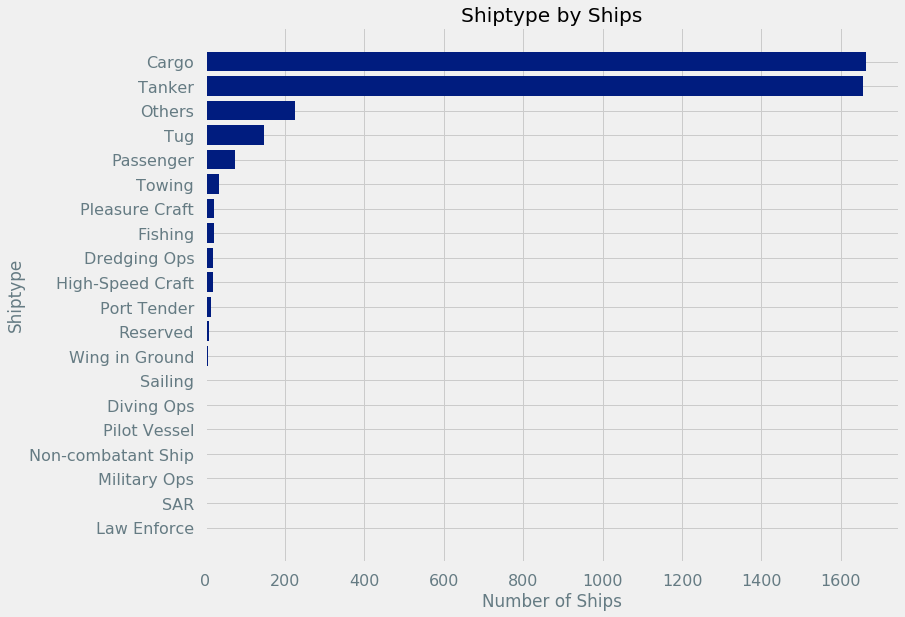

In [287]:
# data = df_stype.drop(index='Undefined').sort_values(by=['records'], ascending=True)
# plot_shiptype(data, 'Records')
data = df_stype.drop(index='Undefined').sort_values(by=['ships'], ascending=True)
plot_shiptype(data, 'Ships')

### Status statistics

In [227]:
df_pos = df.loc[df['type'].isin([1,2,3])]
print('Class A Position Report : {}'.format(len(df_pos)))

Class A Position Report : 4151563


In [263]:
def map_status(number):
    status_cat = ''
    if number == 0:
        status_cat = 'Under way using engine'
    elif number == 1:
        status_cat = 'At anchor'
    elif number == 2:
        status_cat = 'Not under command'
    elif number == 3:
        status_cat = 'Restricted'
    elif number == 4:
        status_cat = 'Constrained by draught'
    elif number == 5:
        status_cat = 'Moored'
    elif number == 6:
        status_cat = 'Aground'
    elif number == 7:
        status_cat = 'Fishing'
    elif number == 8:
        status_cat = 'Sailing'
    elif number == 15:
        status_cat = 'Undefined'
    else:
        status_cat = 'Reserved'
    return status_cat

In [264]:
df_pos.loc[:, 'status_name'] = df_pos.status.apply(map_status)

/Users/andymultazam/opt/anaconda3/envs/movingpandas/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [265]:
status_name = df_pos['status_name'].value_counts()
# shiptype_name_perc = df['shiptype_name'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
df_status = pd.DataFrame(status_name)
df_status.rename(columns={'status_name': 'records'}, inplace=True)

In [266]:
df_status.loc[:, 'ships'] = 0
for status in status_name.keys():
    df_status.loc[status, 'ships'] = len(df_pos.loc[df_pos['status_name']==status].mmsi.unique())

In [40]:
df_status.sort_values(by=['ships'], ascending=False)

NameError: name 'df_status' is not defined

In [ ]:
df_status['perc'] = (df_.ships/df_speed.ships.sum()).mul(100).round(2).astype(str) + '%'

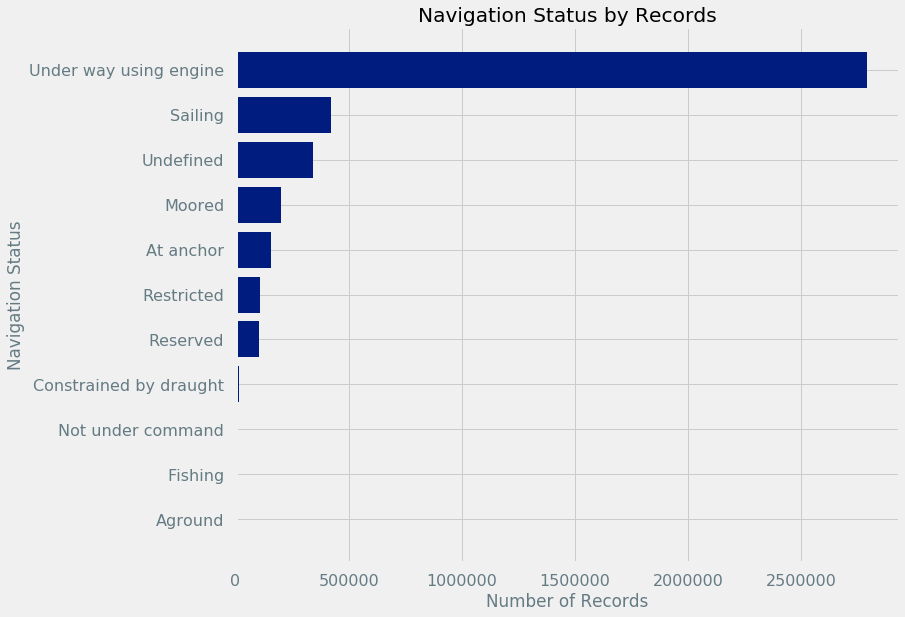

In [275]:
# data = df_status.sort_values(by=['ships'], ascending=True)
# plot_ais(data, 'Ships', 'Navigation Status')
data = df_status.sort_values(by=['records'], ascending=True)
plot_ais(data, 'Records', 'Navigation Status')

### Speed statistics

In [308]:
df.head()

,mmsi,type,speed,accuracy,lon,lat,course,heading,time,status,...,to_stern,to_port,to_starboard,month,day,hour,minute,draught,destination,shiptype_name
0,563015550,18,0.0,0.0,103.72786,1.30646,0.0,NaN,2019-12-01 00:00:07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tug
1,563037440,1,0.2,0.0,103.76168,1.29001,94.3,NaN,2019-12-01 00:00:07,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tanker
2,563040772,18,12.0,0.0,103.75896,1.29214,49.4,NaN,2019-12-01 00:00:08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Undefined
3,566000010,1,0.2,1.0,103.76094,1.29310,NaN,120.0,2019-12-01 00:00:30,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Undefined
4,255805665,1,16.8,0.0,103.75723,1.13256,46.1,48.0,2019-12-01 00:00:30,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Undefined


In [315]:
df['cat_speed'] = pd.cut(df.speed, bins=5, labels=['Slow', 'Medium', 'High', 'Very High', 'Outlier'])

In [356]:
# df.sort_values(by=['mmsi', 'time']).reset_index().loc[100:150, :]

In [345]:
df['speed'].notnull().sum()/len(df)

0.9504547088693225

In [346]:
df['cat_speed'].isnull().sum()

232903

In [335]:
speed_cat

4467907

In [320]:
speed_cat = df['cat_speed'].value_counts()
df_speed = pd.DataFrame(speed_cat)
df_speed.rename(columns={'cat_speed': 'records'}, inplace=True)

In [323]:
df_speed.loc[:, 'ships'] = 0
for speed in speed_cat.keys():
    df_speed.loc[speed, 'ships'] = len(df.loc[df['cat_speed']==speed].mmsi.unique())

In [332]:
df_speed['perc'] = (df_speed.ships/df_speed.ships.sum()).mul(100).round(2).astype(str) + '%'

In [333]:
df_speed

,records,ships,perc
Slow,4359309,26666,87.34%
Medium,105873,1582,5.18%
High,1071,876,2.87%
Outlier,954,800,2.62%
Very High,700,608,1.99%


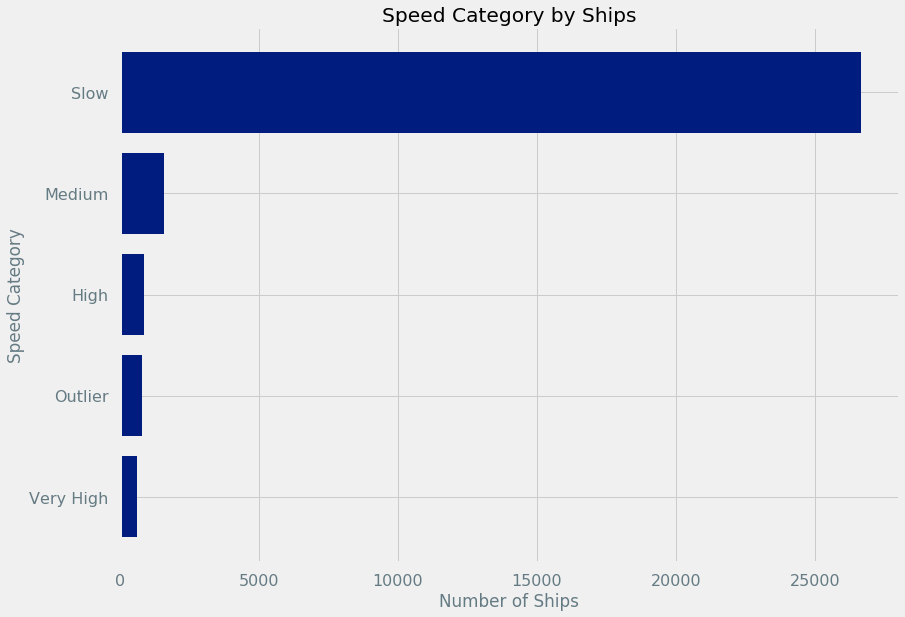

In [325]:
data = df_speed.sort_values(by='ships')
plot_ais(data, 'Ships', 'Speed Category')

### Course

In [ ]:
df['cat_course'] = pd.cut(df.course, bins=8, labels=['Slow', 'Medium', 'High', 'Very High', 'Outlier'])

### Type

In [10]:
type_cat = df['type'].value_counts()
df_type = pd.DataFrame(type_cat)
df_type.rename(columns={'type': 'records'}, inplace=True)

In [11]:
type_cat.keys()

Int64Index([1, 3, 18, 5, 19, 2], dtype='int64')

In [12]:
df_type.loc[:, 'ships'] = 0
for types in type_cat.keys():
    df_type.loc[types, 'ships'] = len(df.loc[df['type']==types].mmsi.unique())

In [31]:
df_type.index = df_type.index.astype(str)

['2', '19', '5', '18', '3', '1']


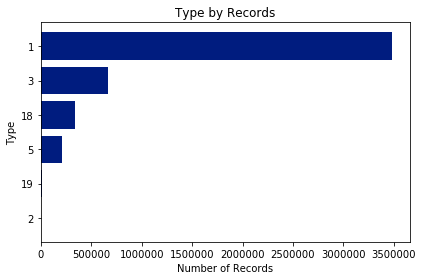

In [35]:
data = df_type.sort_values(by='records')
plot_ais(data, 'Records', 'Type')

['19', '2', '18', '5', '3', '1']


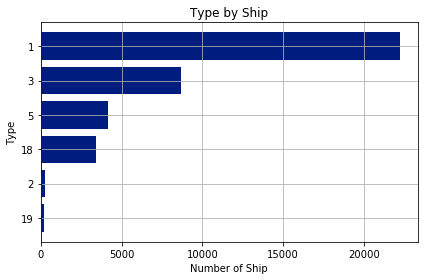

In [37]:
data = df_type.sort_values(by='ships')
plot_ais(data, 'Ship', 'Type')